## Build a Linear Regression class ---> scikit-learn

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


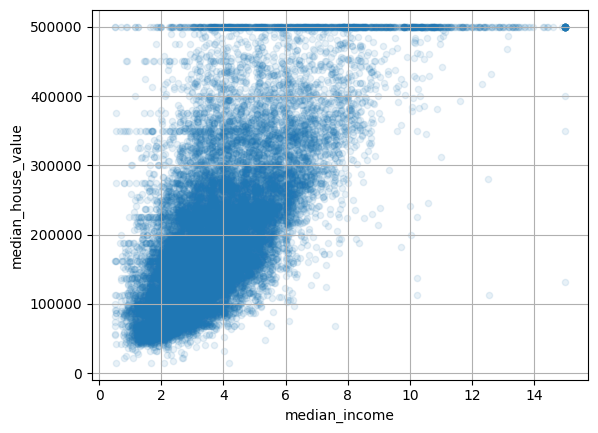

In [6]:
# Build a class out from scratch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read in the data
data = pd.read_csv('Dataset/housing.csv')
data.head()

# Create a correlation matrix
num_data = data.select_dtypes(include=[np.number])
corr_matrix = num_data.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# Plot the two most correlated features (median_income -> median_house_value)
data.plot(kind='scatter', x='median_income', y='median_house_value',
          alpha=0.1, grid=True)
plt.show()

In [7]:
# Build out a class from scratch
# Function wrapper
def validate_input(func):
    def wrapper(self, X, y=None):
        X = np.asanyarray(X)
        if y is not None and X.shape[0] != y.shape[0]:
            raise ValueError('The inputs must be the same length')
        if y is not None:
            y = np.ravel(np.asanyarray(y))
        if X.ndim == 1:
            X = X[:, np.newaxis]
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        if y is not None:
            return func(self, X, y)
        return func(self, X)
    return wrapper

# Class --> 
class LinearRegression:
    def __init__(self) -> None:
        self.bias = None
        self.weights = None

    @validate_input
    def fit(self, X, y) -> None:
        computed_params = np.linalg.inv(X.T @ X) @ (X.T @ y)
        self.bias = computed_params[0]
        self.weights = computed_params[1]
        return self.bias, self.weights
    
    @validate_input
    def predict(self, X):
        bias_weights = np.vstack(([self.bias], self.weights)).reshape(-1, 1)
        return X @ bias_weights

In [8]:
# Get our training and testing data
X = data[['median_income']].values
y = data[['median_house_value']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the class
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)

# Evaluate the model
my_rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE: {my_rmse}")

RMSE: 84209.01241414454


In [9]:
# Build a lin-reg model using the sklearn library
from sklearn.linear_model import LinearRegression

lin_reg_SK = LinearRegression()
lin_reg_SK.fit(X_train, y_train)
new_preds = lin_reg_SK.predict(X_test)

# Evaluate this model
sk_rmse = mean_squared_error(y_test, new_preds, squared=False)
print(f"New RMSE: {sk_rmse}")

New RMSE: 84209.01241414454


In [10]:
assert my_rmse == sk_rmse # NICE!!!